## Overview

En este notebook, aplicaremos el modelo de `Random Forest Classifier` para la prediccion de pacientes con posible Sindrome de Ovario Poliquistico (`SOP`), usaremos de base el analisis previo realizado en este mismo proyecto. Donde podemos resumir que observamos 12 vairables descriptivas mas significantes para nuestra variable objetivo (`PCOS`), es por eso que usaremos las variables descriptivas observadas para el entrenamiendo y predicciones de este modelo.

La base de datos que se usará como ya ha sido mencionado es una base de datos proporcionada por un Cluster especializado en el area de biomedica, esto junto al previo preprocesamiento realizado obtenemos la base de datos ya limpia y lista para su uso.

El objetivo de este modelo es predecir con un rango alto de exactitud los posibles pacientes con Sindorome de Ovario Poliquistico (`SOP`), tomando como referencia los pacientes con y sin `SOP` proporcionados por la base de datos.

## Importacion de Librerias

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

# from graphviz import Source

## Importacion de Datos

In [2]:
url = '../../dataset/PCOS_data_cleaned.csv'

df = pd.read_csv(url)
df.head()

,y,Age,Weight,Height,BMI,BloodGroup,PulseRate,RR,Hb,Cycle,...,Pimples,FastFood,RegExercise,BPSystolic,BPDiastolic,FollicleNoL,FollicleNoR,AvgFsizeL,AvgFsizeR,Endometrium
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


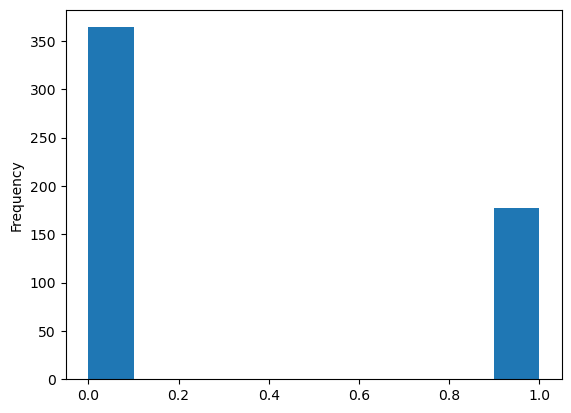

In [4]:
plt.hist(df['y'])
plt.ylabel('Frequency')
plt.show()

## Definir Variable Objetivo y Predictoras

Como mencionamos al inicio, no usaremos todas las variables predictoras disponibles del dataset, sino, usaremos las variables predictoras mas significantes en cuanto a correlacion para nuestra variable objetivo. Siendo estas las siguientes 12 variables junto con su nivel de correlacion respectivamente:
- FollicleNoR = 0.65
- SkinDarkening = 0.48
- HairGrowth = 0.46
- WeightGain = 0.44
- Cycle = 0.40
- FastFood = 0.38
- Pimples = 0.29
- AMH = 0.26
- Weight = 0.21
- HairLoss = 0.17
- Waist = 0.16
- CycleLenght = -0.18

In [7]:
X = df[[
    'FollicleNoR',
    'SkinDarkening',
    'HairGrowth',
    'WeightGain', 
    'Cycle',
    'FastFood',
    'Pimples',
    'AMH',
    'Weight',
    'HairLoss',
    'Waist',
    'CycleLength'
]]
y = df['y']

## Dividir Datos de Prueba y Entrenamiento

Dividimos el total de datos en datos de entrenamiento y prueba, siendo un 70% los de entrenamiento y 30% los de prueba para poder comparar los resultados del modelo.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('X_train shape: ', X_train.shape[0])
print('X_test shape: ', X_test.shape[0])
print('y_train shape: ', y_train.shape[0])
print('y_test shape: ', y_test.shape[0])

X_train shape:  378
X_test shape:  163
y_train shape:  378
y_test shape:  163


## Implementacion del Modelo

Para la implementacion del modelo usaremos una libreria de Python ya creada, esta libreria se llama `scikit-learn` la cual nos ayudara a implementar el modelo con las funciones que ya vienen integradas junto con la libreria.

Usaremos `Random Forest` el cual es un modelo de ensamble basado en árboles de decisión que combina muchos árboles individuales para lograr una predicción más robusta y precisa. La predicción final se obtiene por votación mayoritaria (en clasificación) o promedio (en regresión), lo que reduce el riesgo de sobreajuste de los árboles individuales.

Este enfoque se conoce como Bagging (Bootstrap Aggregating), y se basa en dos ideas clave:

- Cada árbol se entrena con una muestra aleatoria con reemplazo (bootstrap sample) del conjunto de entrenamiento.
- En cada división del árbol, se considera sólo un subconjunto aleatorio de características (no todas), lo que introduce diversidad adicional entre los árboles.

Gracias a esta combinación de aleatoriedad y votación, las Random Forests suelen generalizar mejor que un árbol individual, tienen menor varianza y suelen requerir menos ajuste de hiperparámetros.

In [20]:
# Instanciamos el modelo y sus hiperparámetros
forest = RandomForestClassifier(n_jobs=1,
                                oob_score=True,
                                n_estimators=50,
                                random_state=42)

In [21]:
# Entrenamos con todos los datos para usar oob_score
forest.fit(X,y)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [25]:
# Métricas con validación OOB
print(f"OOB Score: {forest.oob_score_:.4f}")

OOB Score: 0.8780


In [26]:
# Prediccion para evaluación estándar
y_pred_forest = forest.predict(X)

In [27]:
forest.oob_decision_function_

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       ...,
       [1.        , 0.        ],
       [0.68      , 0.32      ],
       [0.        , 1.        ]], shape=(541, 2))

## Evaluacion de Rendimiento

In [31]:
# Exactitud
print(f"Accuracy: {accuracy_score(y, y_pred_forest):.4f}")

Accuracy: 1.0000


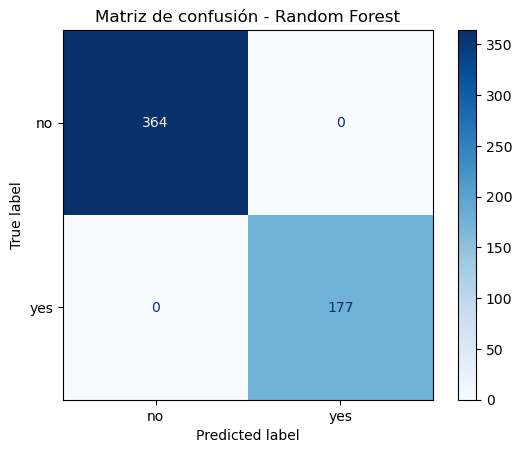

In [38]:
# Matriz de confucion
ConfusionMatrixDisplay.from_estimator(forest, X, y, display_labels=['no', 'yes'], cmap='Blues')
plt.grid(False)
plt.title("Matriz de confusión - Random Forest")
plt.show()

In [41]:
# Reporte
print("\nReporte de clasificación:")
print(classification_report(y, y_pred_forest, target_names=['no', 'yes']))


Reporte de clasificación:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00       364
         yes       1.00      1.00      1.00       177

    accuracy                           1.00       541
   macro avg       1.00      1.00      1.00       541
weighted avg       1.00      1.00      1.00       541



# Importancia de Caracteristicas

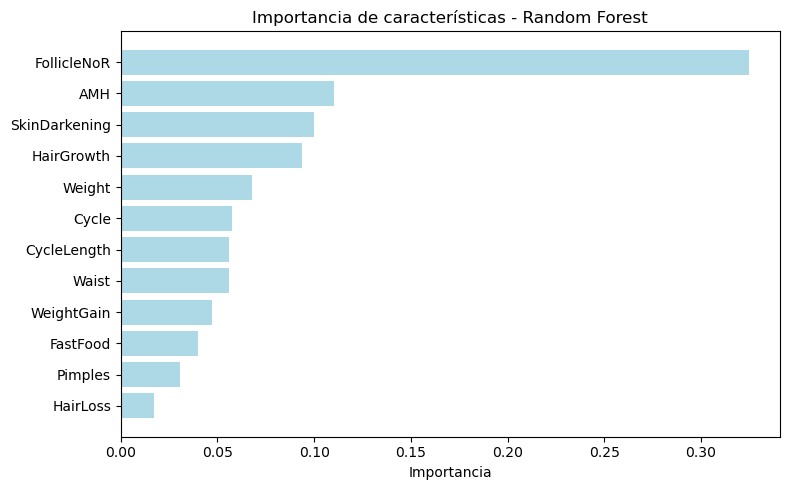

In [35]:
importances = forest.feature_importances_
feature_names = forest.feature_names_in_

df_importance = pd.DataFrame({'feature': feature_names, 'importance': importances})
df_importance = df_importance.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(df_importance['feature'], df_importance['importance'], color='lightblue')
plt.xlabel("Importancia")
plt.title("Importancia de características - Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Conclusion